In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('lab01_dataset_2.csv')
data.head()

,X,Y,Z,Class
0,-2.153269,-1.910092,-2.089200,Negative
1,3.354634,-1.803199,-2.849789,Negative
2,-2.773528,4.644997,2.412375,Positive
3,2.890608,-1.188494,-1.723388,Negative
4,-3.416683,4.789795,3.157649,Positive


In [77]:
data.shape

(200, 4)

In [78]:
def my_perceptron():
    thresholdRate = 0.01
    weight = [1, 2, 3]
    X = data.iloc[:, :-1].values
    Y = np.where (data.iloc[:,-1] == "Positive", 1, -1)
    bias = 0
    misClassificationRate = 1.0

    while (misClassificationRate > thresholdRate):
        for i in range(0, len(X)):
            misClassifiedDataPoints = 0
            print("X values : ", X[i], "weight : ", weight, " | Y[i] * (np.dot(X[i], weight) + bias) : ", Y[i] * (np.dot(X[i], weight) + bias))
            if Y[i] * (np.dot(X[i], weight) + bias) <= 0 :
                weight += Y[i] * X[i]
                bias += Y[i]
                misClassifiedDataPoints += 1
                print("Misclassified | ", bias, " | weight : ", weight)
            
        misClassificationRate = misClassifiedDataPoints / len(X)
        
    return np.concatenate(([bias], weight))

weightedn = my_perceptron()
print(weightedn)

X values :  [-2.15326928 -1.9100922  -2.08920045] weight :  [1, 2, 3]  | Y[i] * (np.dot(X[i], weight) + bias) :  12.24105502431535
X values :  [ 3.35463418 -1.80319913 -2.84978878] weight :  [1, 2, 3]  | Y[i] * (np.dot(X[i], weight) + bias) :  8.801130430248417
X values :  [-2.77352781  4.64499734  2.41237452] weight :  [1, 2, 3]  | Y[i] * (np.dot(X[i], weight) + bias) :  13.753590440385008
X values :  [ 2.89060771 -1.18849411 -1.72338848] weight :  [1, 2, 3]  | Y[i] * (np.dot(X[i], weight) + bias) :  4.65654595188065
X values :  [-3.4166827   4.78979468  3.15764895] weight :  [1, 2, 3]  | Y[i] * (np.dot(X[i], weight) + bias) :  15.635853512484793
X values :  [-2.83013452 -2.02366229  0.50509779] weight :  [1, 2, 3]  | Y[i] * (np.dot(X[i], weight) + bias) :  5.3621657044223
X values :  [ 3.24532902 -2.43202294 -1.95873669] weight :  [1, 2, 3]  | Y[i] * (np.dot(X[i], weight) + bias) :  7.494926936961676
X values :  [-3.71732962  3.51028064  3.41353218] weight :  [1, 2, 3]  | Y[i] * (np.

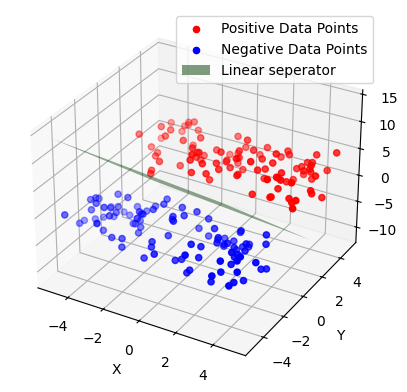

In [79]:
def build3DGraph():
    figure = plt.figure()
    figure = figure.add_subplot(111, projection='3d')

    figure.scatter(data.loc[data['Class'] == 'Positive', 'X'],
                            data.loc[data['Class'] == 'Positive', 'Y'],
                            data.loc[data['Class'] == 'Positive', 'Z'],
                            color='red',
                            label='Positive Data Points'
                    )
    
    figure.scatter(data.loc[data['Class'] == 'Negative', 'X'], 
                   data.loc[data['Class'] == 'Negative', 'Y'],
                   data.loc[data['Class'] == 'Negative', 'Z'],
                    color='blue',
                            label='Negative Data Points')
    
    x_axis, y_axis = np.meshgrid(range(-5, 5), range(-5, 5))
    z_axis = (-0 - 0.65363027 * x_axis -  5.5543439 * y_axis ) /  2.22143049
    figure.plot_surface(x_axis, y_axis, z_axis, color='green', alpha= 0.5, label = 'Linear seperator')

    figure.set_xlabel('X')
    figure.set_ylabel('Y')
    figure.set_zlabel('Z')

    plt.legend()
    plt.show()

build3DGraph()

In [ ]:
s